In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
df = pd.read_csv(f'../liveness_sim/full_simulation_results_nodes_BarabasiAlbert.csv')

# Convert to appropriate data types
df = df.astype({
    'nodes': 'int',
    'guardians': 'int',
    'threshold': 'int',
    'fdkgPercentage': 'float',
    'tallierRetPct': 'float',
    'successRate': 'float'
})

# Add protocol type column without removing DKG from FDKG
df['protocol'] = np.where(
    (df['fdkgPercentage'] == 1.0) & (df['guardians'] == df['nodes'] - 1),
    'DKG',
    'FDKG'
)

# Create filtered dataframes (DKG entries exist in both)
dkg_df = df[df['protocol'] == 'DKG'].copy()
fdkg_df = df.copy()  # Keep all FDKG entries including DKG special cases

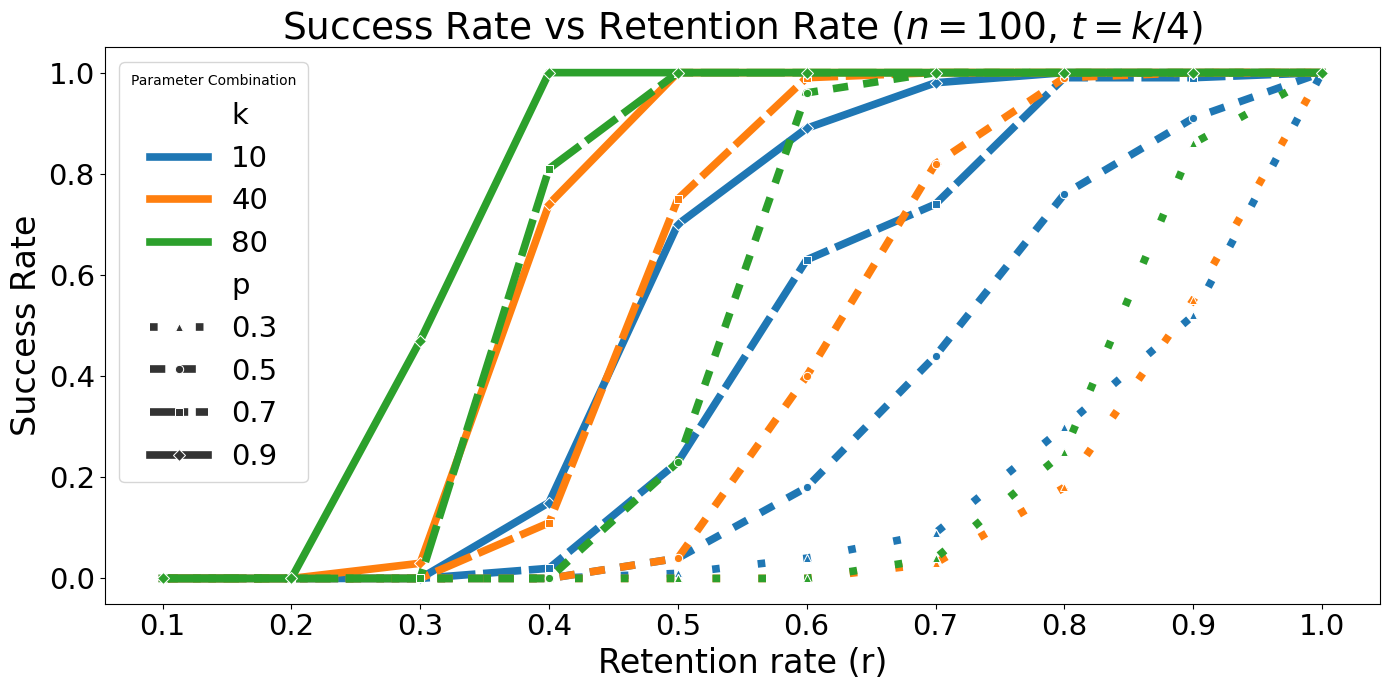

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dense_df = pd.read_csv('../liveness_sim/dense_simulation_results_nodes_BarabasiAlbert.csv')
n = 100


# Rename columns to have `k` and `r` in the final plot legend
fdkg_renamed = dense_df.rename(columns={
    'guardians': 'k',
    'tallierRetPct': 'r',
    'fdkgPercentage': 'p'
})

# Filter and copy to avoid SettingWithCopyWarning
fdkg_subset = fdkg_renamed[
    (fdkg_renamed['nodes'] == n) &
    (fdkg_renamed['p'].isin([0.3, 0.5, 0.7, 0.9])) &
    (fdkg_renamed['threshold'] == fdkg_renamed['k'] // 4) &
    (fdkg_renamed['k'].isin([10, 40, 80, 99]))
].copy()



plt.figure(figsize=(14, 7))

plt.rcParams.update({
    'axes.titlesize': 27,
    'axes.labelsize': 24,
    'xtick.labelsize': 21,
    'ytick.labelsize': 21,
    'legend.fontsize': 21
})

# Use the "tab10" color palette, and assign distinct markers for each r value.
sns.lineplot(
    data=fdkg_subset,
    x='r',
    y='successRate',
    hue='k',
    style='p',
    palette="tab10",
    linewidth=5.5,
    dashes={0.9: '', 0.7: (5, 1), 0.5: (2, 2), 0.3: (1, 5)},
    markers={0.9: "D", 0.7: "s",0.5: "o", 0.3: "^"}
)



plt.title(f"Success Rate vs Retention Rate ($n={n}$, $t=k/4$)")
plt.xlabel("Retention rate (r)")
plt.ylabel("Success Rate")
# Make x-axis more granular: ticks every 0.1
import numpy as np
plt.xticks(np.arange(0.1, 1.01, 0.1))
plt.tight_layout()
plt.savefig("parameters_significance_retention_axis.png")
plt.legend(title="Parameter Combination", loc='upper left')
plt.show()

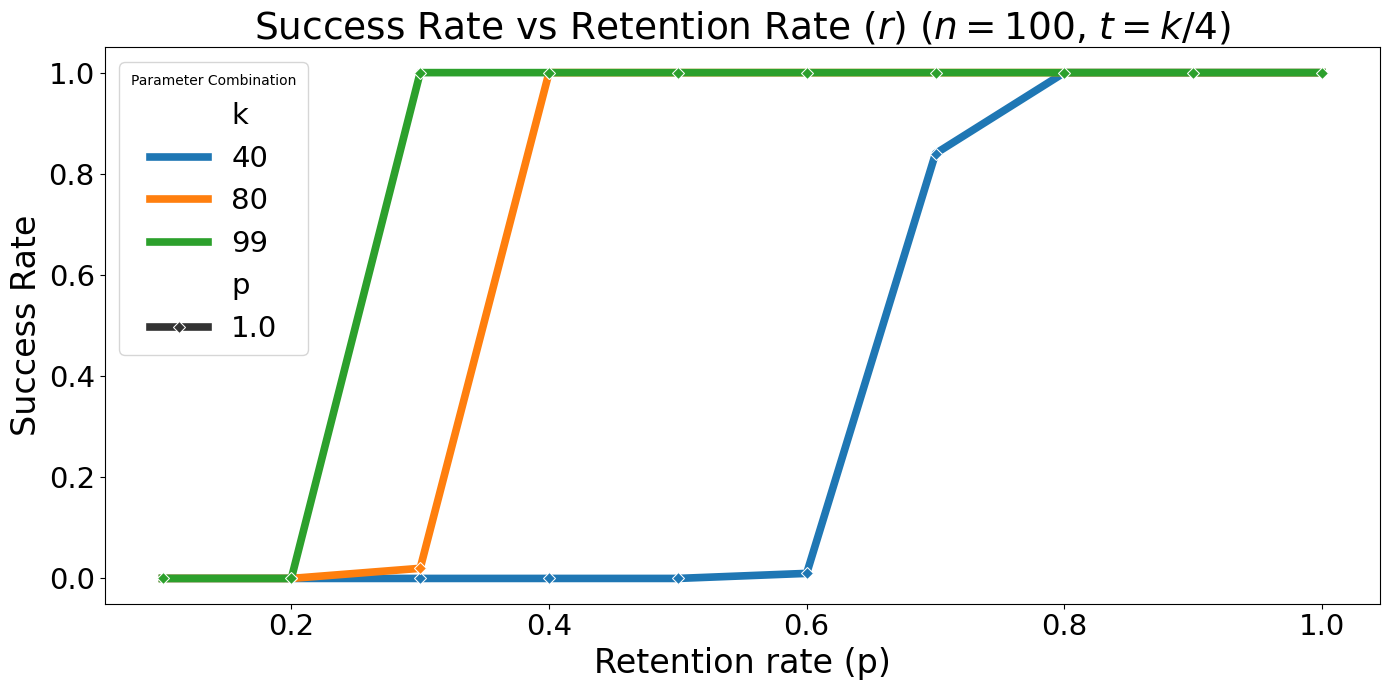

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dense_df = pd.read_csv('../liveness_sim/dense_simulation_results_nodes_BarabasiAlbert.csv')
n = 100


# Rename columns to have `k` and `r` in the final plot legend
fdkg_renamed = dense_df.rename(columns={
    'guardians': 'k',
    'tallierRetPct': 'r',
    'fdkgPercentage': 'p'
})

# Filter and copy to avoid SettingWithCopyWarning
fdkg_subset = fdkg_renamed[
    (fdkg_renamed['nodes'] == n) &
    (fdkg_renamed['p'].isin([1.0])) &
    ((fdkg_renamed['threshold'] == 25) | (fdkg_renamed['threshold'] == 24)) &
    (fdkg_renamed['k'].isin([10, 40, 80, 99]))
].copy()



plt.figure(figsize=(14, 7))

plt.rcParams.update({
    'axes.titlesize': 27,
    'axes.labelsize': 24,
    'xtick.labelsize': 21,
    'ytick.labelsize': 21,
    'legend.fontsize': 21
})

# Use the "tab10" color palette, and assign distinct markers for each r value.
sns.lineplot(
    data=fdkg_subset,
    x='r',
    y='successRate',
    hue='k',
    style='p',
    palette="tab10",
    linewidth=5.5,
    dashes={1.0: '',0.9: (12, 1), 0.7: (4, 1), 0.5: (2, 2), 0.3: (1, 5)},
    markers={1.0: "D", 0.9: "D", 0.7: "s",0.5: "o", 0.3: "^"}
)



plt.title(f"Success Rate vs Retention Rate ($r$) ($n={n}$, $t=k/4$)")
plt.xlabel("Retention rate (r)")
plt.ylabel("Success Rate")
plt.tight_layout()
plt.savefig("parameters_significance_retention_axis.png")
plt.legend(title="Parameter Combination", loc='upper left')
plt.show()

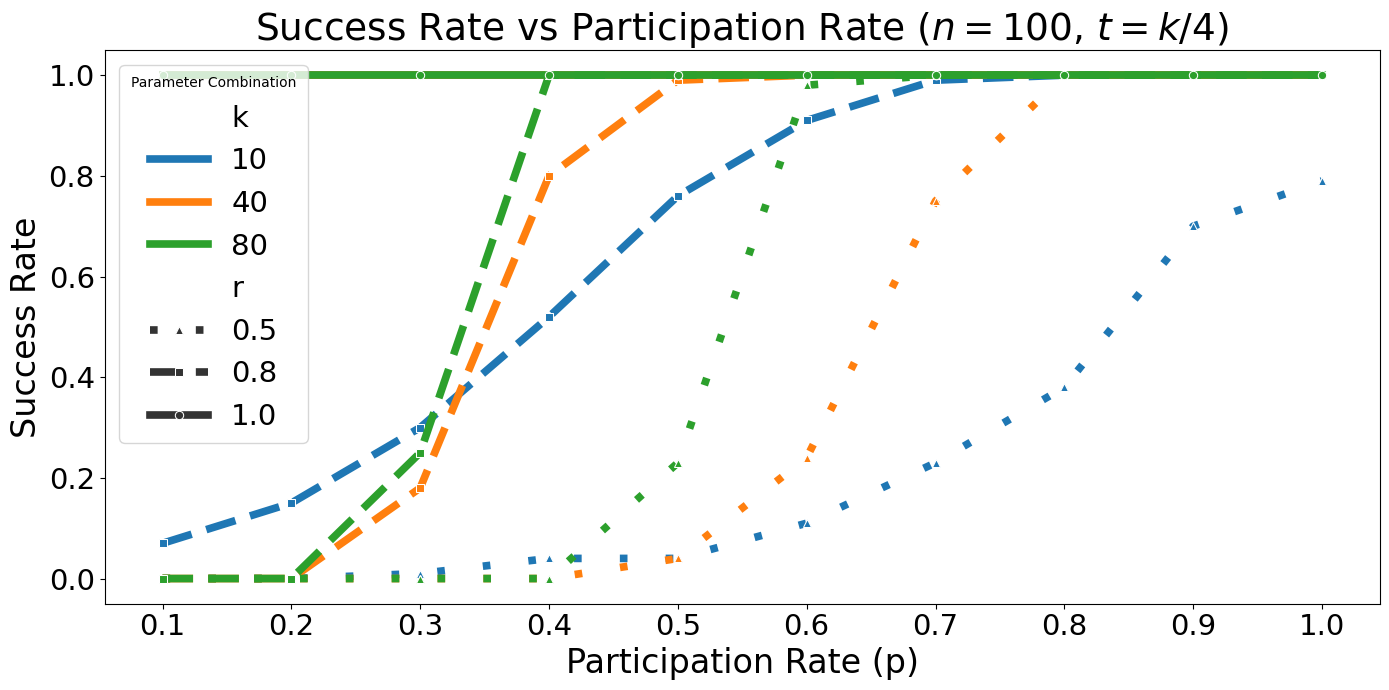

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data
dense_df = pd.read_csv('../liveness_sim/dense_simulation_results_nodes_BarabasiAlbert.csv')
n = 100

# Rename columns for clarity
fdkg_renamed = dense_df.rename(columns={
    'guardians': 'k',
    'tallierRetPct': 'r'
})

# Filter data
fdkg_subset = fdkg_renamed[
    (fdkg_renamed['nodes'] == n) &
    (fdkg_renamed['r'].isin([0.5, 0.8, 1.0])) &
    (fdkg_renamed['threshold'] == fdkg_renamed['k'] // 4) &
    (fdkg_renamed['k'].isin([10, 40, 80]))
].copy()

plt.figure(figsize=(14, 7))

# Use the "tab10" color palette, and assign distinct markers for each r value.
sns.lineplot(
    data=fdkg_subset,
    x='fdkgPercentage',
    y='successRate',
    hue='k',
    style='r',
    palette="tab10",
    linewidth=5.5,
    markers={1.0: "o", 0.8: "s", 0.5: "^"},
    dashes={1.0: '', 0.8: (4, 2), 0.5: (1, 5)}
)

plt.rcParams.update({
    'axes.titlesize': 27,
    'axes.labelsize': 24,
    'xtick.labelsize': 21,
    'ytick.labelsize': 21,
    'legend.fontsize': 21
})

plt.title(f"Success Rate vs Participation Rate ($n={n}$, $t=k/4$)")
plt.xlabel("Participation Rate (p)")
plt.ylabel("Success Rate")
plt.legend(title="Parameter Combination", loc='upper left')
import numpy as np
plt.xticks(np.arange(0.1, 1.01, 0.1))
plt.tight_layout()
plt.savefig("parameters_significance_participation_axis.png")
plt.show()

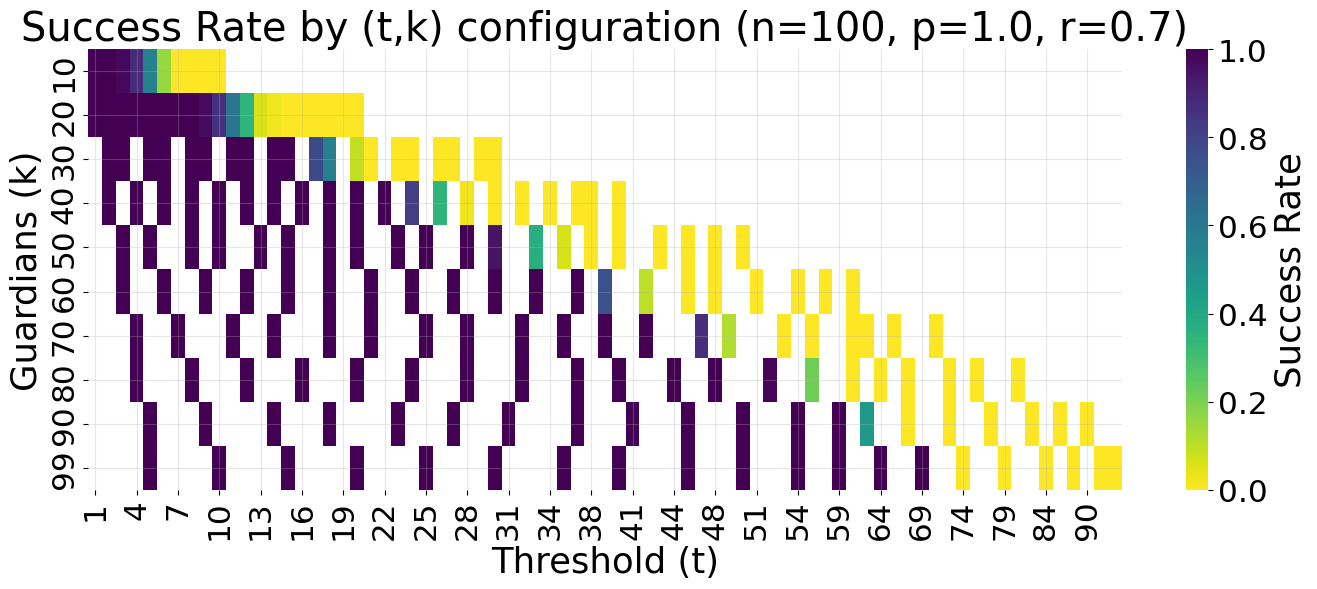

In [6]:

# --------------------------------------------------
# Plot 3: Guardian Set Configuration Heatmap
# Show success rates for different (k,t) combinations
# --------------------------------------------------
n = 100
p = 1.0
r = 0.7
plt.rcParams.update({
    'axes.titlesize': 18*1.6,
    'axes.labelsize': 16*1.6,
    'xtick.labelsize': 14*1.6,
    'ytick.labelsize': 14*1.6,
    'legend.fontsize': 14*1.6
})


heatmap_data = fdkg_df[
    (fdkg_df['nodes'] == n) &
    (fdkg_df['fdkgPercentage'] == p) &
    (fdkg_df['tallierRetPct'] == r)
    #(fdkg_df['protocol'] == 'FDKG')
].pivot_table(index='guardians', columns='threshold', values='successRate')

plt.figure(figsize=(14, 6))
sns.heatmap(
    heatmap_data, 
    annot=False, 
    fmt=".2f", 
    cmap='viridis_r',
    cbar_kws={'label': 'Success Rate'}
)
plt.title(f"Success Rate by (t,k) configuration (n={n}, p={p}, r={r})")
plt.xlabel("Threshold (t)")
plt.ylabel("Guardians (k)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'guardian_set_configuration_n{n}_p{p}_r{r}.png')
plt.show()

In [7]:
ba_df = pd.read_csv(f'../liveness_sim/full_simulation_results_nodes_BarabasiAlbert.csv')
random_df = pd.read_csv(f'../liveness_sim/full_simulation_results_nodes_RandomGraph.csv')

# Add network model identifiers
ba_df['network_model'] = 'Barabási-Albert'
random_df['network_model'] = 'Random'

ba_df = ba_df[ba_df['nodes'] <= 2000]
random_df = random_df[random_df['nodes'] <= 2000]

print(100, len(ba_df[ba_df['nodes'] == 100]))
print(200, len(ba_df[ba_df['nodes'] == 200]))
print(300, len(ba_df[ba_df['nodes'] == 300]))
print(350, len(ba_df[ba_df['nodes'] == 350]))
print(400, len(ba_df[ba_df['nodes'] == 400]))
print(500, len(ba_df[ba_df['nodes'] == 500]))
print(600, len(ba_df[ba_df['nodes'] == 600]))
print(700, len(ba_df[ba_df['nodes'] == 700]))
print(800, len(ba_df[ba_df['nodes'] == 800]))
print(900, len(ba_df[ba_df['nodes'] == 900]))
print(1000, len(ba_df[ba_df['nodes'] == 1000]))
print(1250, len(ba_df[ba_df['nodes'] == 1250]))

100 2280
200 2400
300 2400
350 2400
400 2400
500 2400
600 2400
700 2400
800 2400
900 2400
1000 2400
1250 2400


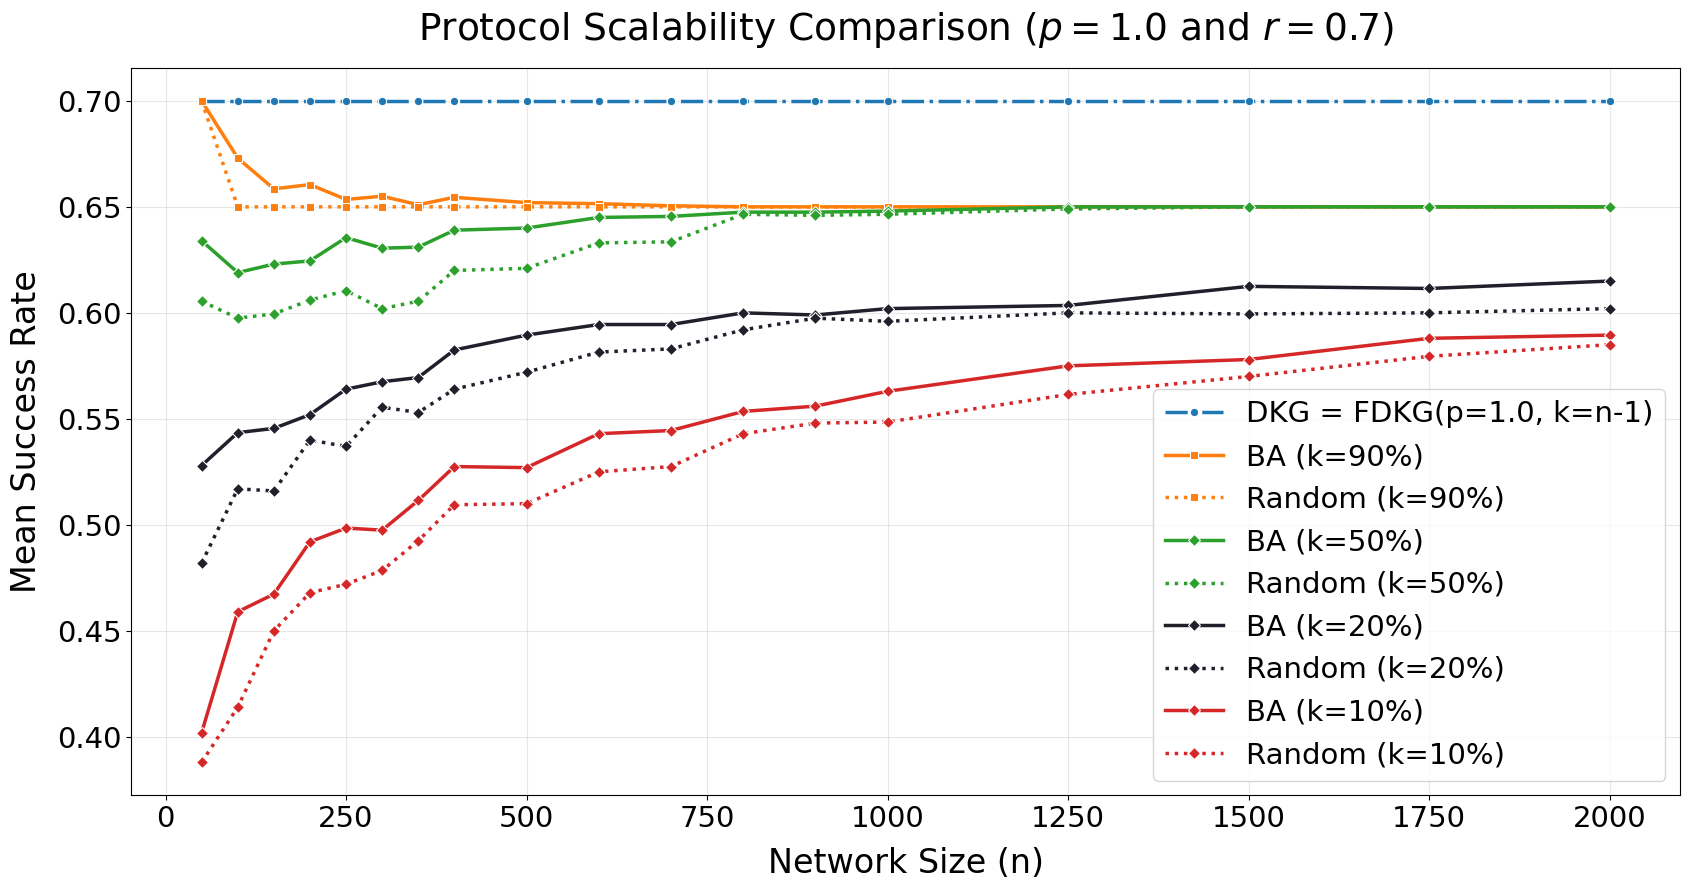

In [8]:
# --------------------------------------------------
# Plot 4c: Scalability Comparison with Network Models
# --------------------------------------------------

# Load and prepare both network models
ba_df = pd.read_csv(f'../liveness_sim/full_simulation_results_nodes_BarabasiAlbert.csv')
random_df = pd.read_csv(f'../liveness_sim/full_simulation_results_nodes_RandomGraph.csv')

# Add network model identifiers
ba_df['network_model'] = 'Barabási-Albert'
random_df['network_model'] = 'Random'

ba_df = ba_df[ba_df['nodes'] <= 2000]
random_df = random_df[random_df['nodes'] <= 2000]

# Combine datasets
combined_df = pd.concat([ba_df, random_df], ignore_index=True)

# Fix SettingWithCopyWarning by working with explicit copies
def prepare_scaling_data(base_df, r, p, guardian_ratio):
    """Safe dataframe preparation with copy"""
    df = base_df[
        (base_df['tallierRetPct'] == r) &
        (base_df['fdkgPercentage'] == p) &
        (base_df['guardians'] == round(base_df['nodes'] * guardian_ratio if guardian_ratio != 1.0 else base_df['nodes']-1))
    ].copy()  # Explicit copy to avoid warnings
    
    # Calculate 95% CI using exact binomial formula
    n_simulations = 100
    df['ci'] = 1.96 * np.sqrt(
        df['successRate'] * (1 - df['successRate']) / n_simulations
    )
    return df

# Common parameters
r = 0.7
p = 1.0

# Prepare all data series
data_sources = [
    {
        'label': 'DKG = FDKG(p=1.0, k=n-1)',
        'guardian_ratio': 1.0,
        'network_model': 'all',
        'style': {'color': '#1f77b4', 'linestyle': '-.', 'marker': 'o'}
    },
    {
        'label': 'BA (k=90%)',
        'guardian_ratio': 0.9,
        'network_model': 'Barabási-Albert',
        'style': {'color': '#ff7f0e', 'linestyle': '-', 'marker': 's'}
    },
    {
        'label': 'Random (k=90%)',
        'guardian_ratio': 0.9,
        'network_model': 'Random',
        'style': {'color': '#ff7f0e', 'linestyle': ':', 'marker': 's'}
    },
    {
        'label': 'BA (k=50%)',
        'guardian_ratio': 0.5,
        'network_model': 'Barabási-Albert',
        'style': {'color': '#2ca02c', 'linestyle': '-', 'marker': 'D'}
    },
    {
        'label': 'Random (k=50%)',
        'guardian_ratio': 0.5,
        'network_model': 'Random', 
        'style': {'color': '#2ca02c', 'linestyle': ':', 'marker': 'D'}
    },
    {
        'label': 'BA (k=20%)',
        'guardian_ratio': 0.20,
        'network_model': 'Barabási-Albert',
        'style': {'color': '#1f202c', 'linestyle': '-', 'marker': 'D'}
    },
    {
        'label': 'Random (k=20%)',
        'guardian_ratio': 0.20,
        'network_model': 'Random', 
        'style': {'color': '#1f202c', 'linestyle': ':', 'marker': 'D'}
    },
    {
        'label': 'BA (k=10%)',
        'guardian_ratio': 0.10,
        'network_model': 'Barabási-Albert',
        'style': {'color': '#d62728', 'linestyle': '-', 'marker': 'D'}
    },
    {
        'label': 'Random (k=10%)',
        'guardian_ratio': 0.10,
        'network_model': 'Random', 
        'style': {'color': '#d62728', 'linestyle': ':', 'marker': 'D'}
    }
]
plt.rcParams.update({
    'axes.titlesize': 18*1.5,
    'axes.labelsize': 16*1.5,
    'xtick.labelsize': 14*1.5,
    'ytick.labelsize': 14*1.5,
    'legend.fontsize': 14*1.5
})
plt.figure(figsize=(17, 9))

# Plot each series with custom styling
for source in data_sources:
    if source['network_model'] == 'all':
        df = prepare_scaling_data(combined_df, r, p, source['guardian_ratio'])
    else:
        df = prepare_scaling_data(
            combined_df[combined_df['network_model'] == source['network_model']], 
            r, p, source['guardian_ratio']
        )
        
    sns.lineplot(
        data=df,
        x='nodes',
        y='successRate',
        label=source['label'],
        linewidth=2.5,
        errorbar=None,  # Remove error bars if present
        **source['style']
    )

plt.title(f"Protocol Scalability Comparison ($p={p}$ and $r={r}$)", pad=20)
plt.xlabel("Network Size (n)", labelpad=10)
plt.ylabel("Mean Success Rate", labelpad=10)
plt.grid(True, alpha=0.3)
plt.legend(loc='lower right')
plt.savefig('network_model_comparison.png')
plt.tight_layout()
plt.show()

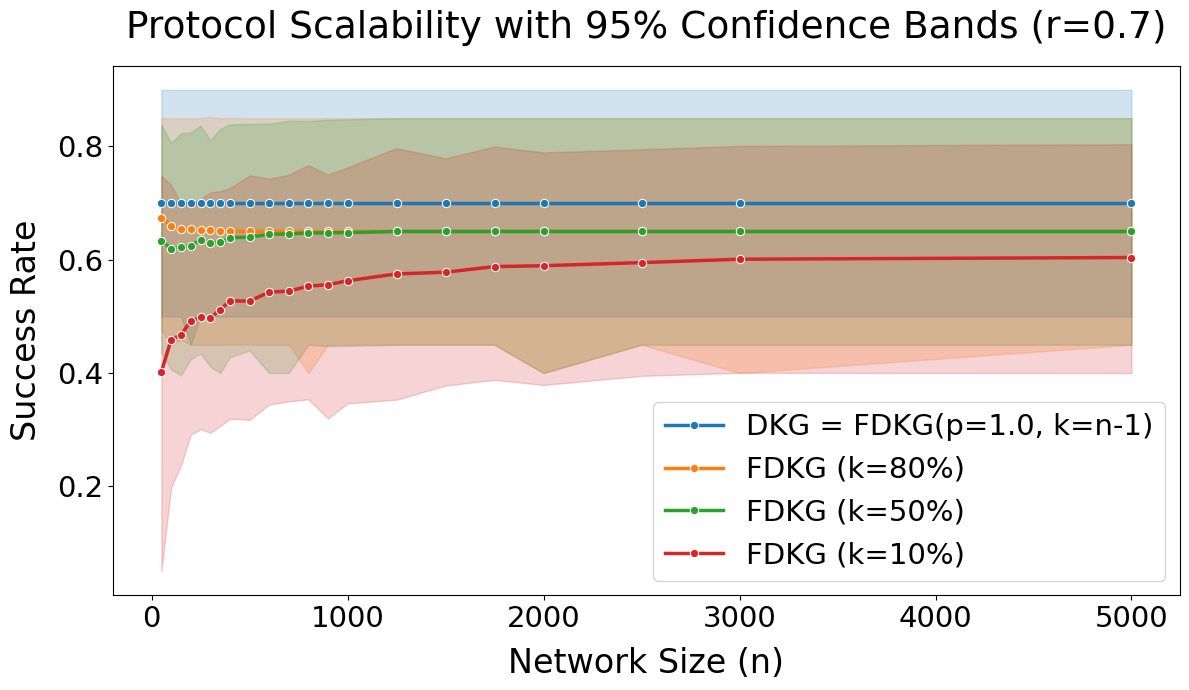

In [9]:
# --------------------------------------------------
# Plot 4: Scalability Comparison with Error Visualization (Fixed)
# --------------------------------------------------

# Fix SettingWithCopyWarning by working with explicit copies
def prepare_scaling_data(base_df, r, p, guardian_ratio):
    """Safe dataframe preparation with copy"""
    df = base_df[
        (base_df['tallierRetPct'] == r) &
        (base_df['fdkgPercentage'] == p) &
        (base_df['guardians'] == round(base_df['nodes'] * guardian_ratio if guardian_ratio != 1.0 else base_df['nodes']-1))
    ].copy()  # Explicit copy to avoid warnings
    
    # Calculate 95% CI using exact binomial formula
    n_simulations = 100
    df['ci'] = 1.96 * np.sqrt(
        df['successRate'] * (1 - df['successRate']) / n_simulations
    )
    return df

# Prepare data with proper error handling
dkg_scaling = prepare_scaling_data(dkg_df, r, 1.0, 1.0)  # k=n-1 for DKG
fdkg_scaling80 = prepare_scaling_data(fdkg_df, r, 1.0, 0.8)
fdkg_scaling50 = prepare_scaling_data(fdkg_df, r, 1.0, 0.5)
fdkg_scaling10 = prepare_scaling_data(fdkg_df, r, 1.0, 0.1)

plt.figure(figsize=(12, 7))

# Plot with confidence bands using Seaborn's built-in CI
sns.lineplot(
    data=dkg_scaling,
    x='nodes',
    y='successRate',
    label='DKG = FDKG(p=1.0, k=n-1)',
    color='#1f77b4',
    linewidth=2.5,
    marker='o',
    err_style='band',  # Show confidence bands
    errorbar=('ci', 95)  # Use precomputed CI
)

for df, label, color in [
    (fdkg_scaling80, 'FDKG (k=80%)', '#ff7f0e'),
    (fdkg_scaling50, 'FDKG (k=50%)', '#2ca02c'),
    (fdkg_scaling10, 'FDKG (k=10%)', '#d62728')
]:
    sns.lineplot(
        data=df,
        x='nodes',
        y='successRate',
        label=label,
        color=color,
        linewidth=2.5,
        marker='o',
        err_style='band',
        
    )

plt.title(f"Protocol Scalability with 95% Confidence Bands (r={r})", pad=20)
plt.xlabel("Network Size (n)", labelpad=10)
plt.ylabel("Success Rate", labelpad=10)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(False, alpha=0.3)
plt.tight_layout()
plt.show()

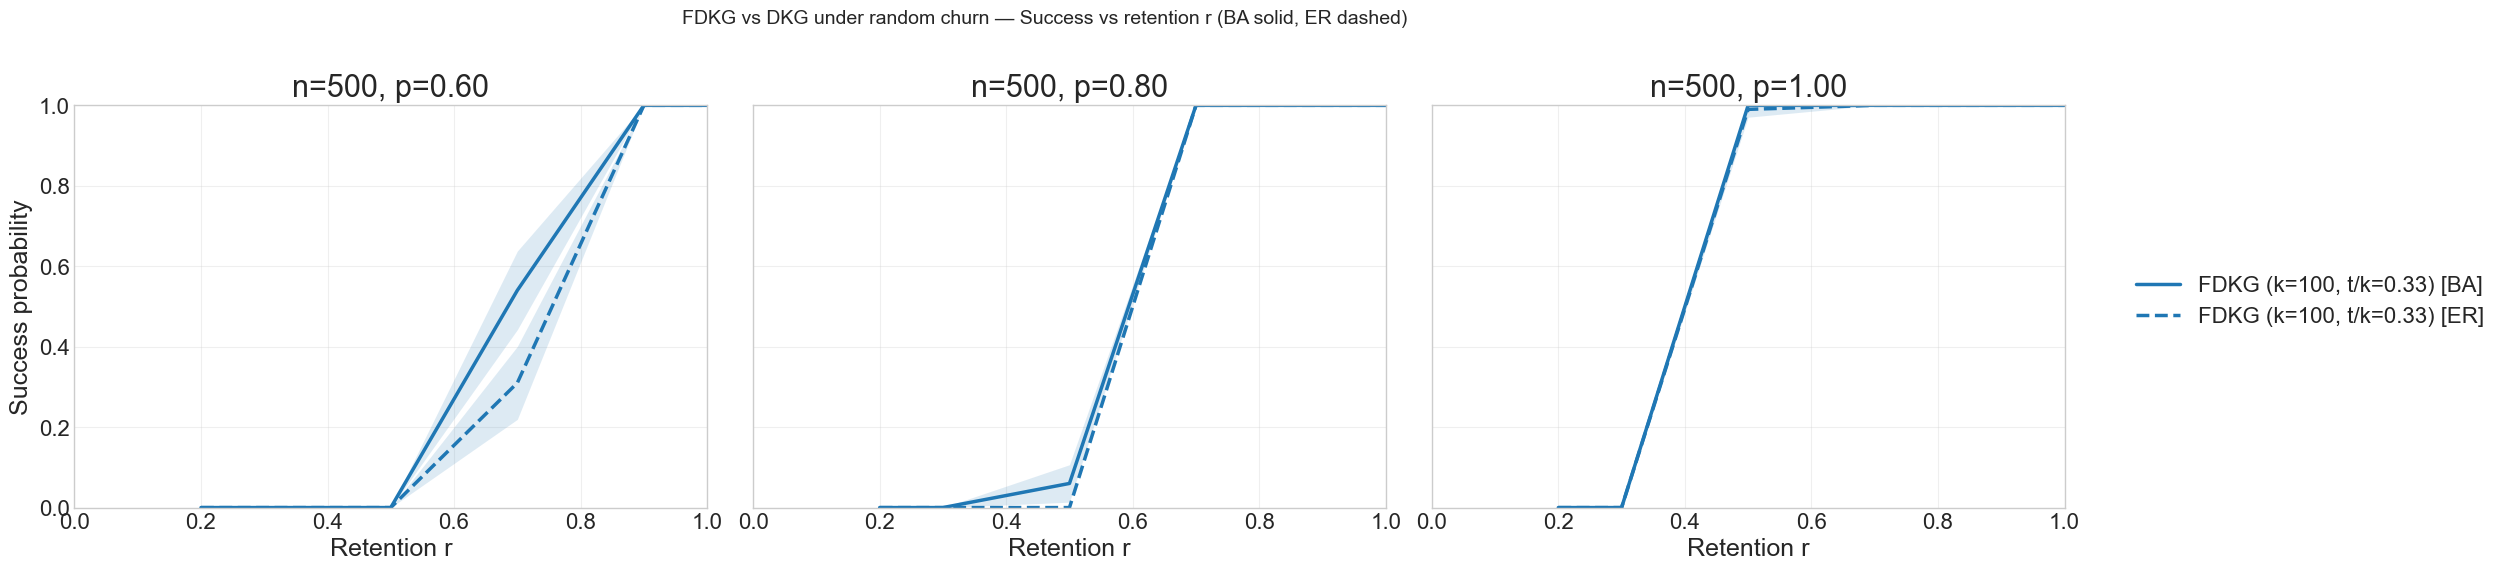

In [23]:
# -*- coding: utf-8 -*-
# Figure A: Success vs retention r — DKG baseline vs FDKG (BA vs ER), fixed n, multiple p panels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# Load simulation result CSVs
# ---------------------------
ba_df = pd.read_csv('../liveness_sim/full_simulation_results_nodes_BarabasiAlbert.csv')
er_df = pd.read_csv('../liveness_sim/full_simulation_results_nodes_RandomGraph.csv')

ba_df['network_model'] = 'BA'
er_df['network_model'] = 'ER'
df = pd.concat([ba_df, er_df], ignore_index=True)

# ------------------------------------
# Column name helpers (be defensive)
# ------------------------------------
def pick_col(dframe, candidates):
    for c in candidates:
        if c in dframe.columns:
            return c
    raise KeyError(f"None of {candidates} found in columns: {list(dframe.columns)}")

COL_N = pick_col(df, ['nodes', 'n'])
COL_P = pick_col(df, ['fdkgPercentage', 'participation', 'p'])
COL_R = pick_col(df, ['tallierRetPct', 'retention', 'r'])
COL_K = pick_col(df, ['guardians', 'k'])
COL_T = pick_col(df, ['threshold', 't'])
COL_SUCC = pick_col(df, ['successRate', 'success', 'probSuccess'])

# If your CSV stores p/r as percentages (0–100) instead of 0–1, normalize:
if df[COL_P].max() > 1.1: df[COL_P] = df[COL_P] / 100.0
if df[COL_R].max() > 1.1: df[COL_R] = df[COL_R] / 100.0

# ------------------------------------
# Config: what to show in the figure
# ------------------------------------
N_FIXED = 500                    # single n for the whole figure
P_PANELS = [0.6, 0.8, 1.0]       # make one subplot per p
K_VALUES = [50, 100, 200, 499]          # FDKG guardian set sizes (lines)
FDKG_T_OVER_K = 0.33             # threshold ratio for FDKG lines
DKG_T_OVER_K = 0.33              # threshold ratio for DKG (k = n-1)
N_TRIALS = 100                   # used for the binomial CI if trials not stored

# Optional: narrow the dataset early
df = df[df[COL_N] == N_FIXED].copy()

# ------------------------------------
# Curve preparation
# ------------------------------------
def _ci95(p, n_trials=N_TRIALS):
    return 1.96 * np.sqrt(p * (1 - p) / n_trials)

def prepare_curve(dframe, p, k, t_over_k, model):
    """Return a tidy df aggregated over r for one (p,k,t/k,model) condition."""
    d = dframe.copy()
    d = d[(d[COL_P] == p) & (d['network_model'] == model)]
    # Integer k/t from ratio
    if k == 'DKG':
        # DKG baseline: k = n-1, t = round((n-1)*ratio)
        d = d[d[COL_K] == (N_FIXED - 1)]
        t_val = int(round((N_FIXED - 1) * t_over_k))
        t_val = max(1, min(t_val, N_FIXED - 1))
        d = d[d[COL_T] == t_val]
    else:
        t_val = int(round(k * t_over_k))
        t_val = max(1, min(t_val, k))
        d = d[(d[COL_K] == k) & (d[COL_T] == t_val)]
    if d.empty:
        return d  # caller should skip
    # Aggregate by r in case of duplicates; compute CI
    g = d.groupby(COL_R, as_index=False)[COL_SUCC].mean()
    g['ci'] = _ci95(g[COL_SUCC].clip(0, 1))
    g['k'] = k
    g['t_over_k'] = t_over_k
    g['model'] = model
    return g.sort_values(COL_R)

# ------------------------------------
# Build all curves to plot
# ------------------------------------
curves = []
for p in P_PANELS:
    # DKG baseline (single line per panel)
    for model in ['BA', 'ER']:
        c = prepare_curve(df, p=p, k='DKG', t_over_k=DKG_T_OVER_K, model=model)
        if not c.empty:
            c['label'] = f"DKG (k=n-1, t/k={DKG_T_OVER_K:.2f}) [{model}]"
            c['panel_p'] = p
            curves.append(c)
    # FDKG lines (k in K_VALUES, fixed t/k)
    for k in K_VALUES:
        for model in ['BA', 'ER']:
            c = prepare_curve(df, p=p, k=k, t_over_k=FDKG_T_OVER_K, model=model)
            if not c.empty:
                c['label'] = f"FDKG (k={k}, t/k={FDKG_T_OVER_K:.2f}) [{model}]"
                c['panel_p'] = p
                curves.append(c)

plot_df = pd.concat(curves, ignore_index=True) if curves else pd.DataFrame()
if plot_df.empty:
    raise RuntimeError("No matching data for the chosen (n, p, k, t/k) — check CSV contents.")

# ------------------------------------
# Plot: one subplot per p
# ------------------------------------
sns.set_style("whitegrid")
ncols = len(P_PANELS)
fig, axes = plt.subplots(1, ncols, figsize=(7*ncols, 5.5), sharey=True)

if ncols == 1:
    axes = [axes]

# Colors per k; linestyle encodes model (BA solid, ER dashed)
palette = {
    'DKG': '#1f77b4',
    10: '#2ca02c',
    20: '#ff7f0e',
    40: '#d62728',
}
linestyle = {'BA': '-', 'ER': '--'}

for ax, p in zip(axes, P_PANELS):
    sub = plot_df[plot_df['panel_p'] == p]
    # Plot DKG first so FDKG overlays
    for (label, model), grp in sub[sub['k'].eq('DKG')].groupby(['label','model']):
        ax.plot(grp[COL_R], grp[COL_SUCC], linestyle=linestyle[model], color=palette['DKG'], linewidth=2.5, label=label)
        ax.fill_between(grp[COL_R], (grp[COL_SUCC]-grp['ci']).clip(0,1), (grp[COL_SUCC]+grp['ci']).clip(0,1),
                        color=palette['DKG'], alpha=0.15, linewidth=0)

    # FDKG lines
    for (k, model, label), grp in sub[sub['k'].ne('DKG')].groupby(['k','model','label']):
        col = palette.get(k, None)
        if col is None:
            # fallback deterministic color
            col = plt.cm.tab10(int(k) % 10)
        ax.plot(grp[COL_R], grp[COL_SUCC], linestyle=linestyle[model], color=col, linewidth=2.5, label=label)
        ax.fill_between(grp[COL_R], (grp[COL_SUCC]-grp['ci']).clip(0,1), (grp[COL_SUCC]+grp['ci']).clip(0,1),
                        color=col, alpha=0.15, linewidth=0)

    ax.set_title(f"n={N_FIXED}, p={p:.2f}")
    ax.set_xlabel("Retention r")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.grid(True, alpha=0.3)

axes[0].set_ylabel("Success probability")
# Single legend (outside right)
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1.01, 0.5), frameon=False)

fig.suptitle("FDKG vs DKG under random churn — Success vs retention r (BA solid, ER dashed)", y=1.03, fontsize=14)
fig.tight_layout()
plt.savefig('network_model_comparison.png', bbox_inches='tight', dpi=200)
plt.show()


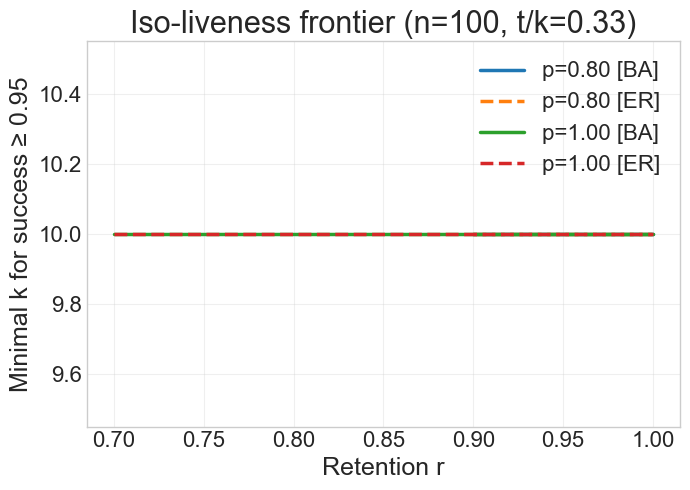

In [14]:
def min_k_frontier(dframe, n, p, t_over_k, model, target=0.95):
    """Return dataframe with minimal k to reach target success per r."""
    d = dframe[(dframe[COL_N]==n) & (dframe[COL_P]==p) & (dframe['network_model']==model)].copy()
    # compute t for each k from t_over_k
    d['t_for_ratio'] = (d[COL_K] * t_over_k).round().astype(int).clip(lower=1)
    d = d[d[COL_T] == d['t_for_ratio']]
    if d.empty: return pd.DataFrame()
    # For each r, pick minimal k with success >= target
    rows = []
    for r_val, g in d.groupby(COL_R):
        g2 = g.sort_values(COL_K)
        # mean over repeated runs at same (n,p,k,t,r)
        agg = g2.groupby(COL_K, as_index=False)[COL_SUCC].mean()
        ok = agg[agg[COL_SUCC] >= target]
        if not ok.empty:
            k_min = int(ok.iloc[0][COL_K])
            rows.append({'r': r_val, 'k_min': k_min})
    return pd.DataFrame(rows).sort_values('r')

# Example usage:
fig, ax = plt.subplots(figsize=(7,5))
for p in [0.6, 0.8, 1.0]:
    for model, ls in [('BA','-'), ('ER','--')]:
        frontier = min_k_frontier(df, n=N_FIXED, p=p, t_over_k=FDKG_T_OVER_K, model=model, target=0.95)
        if frontier.empty: continue
        ax.plot(frontier['r'], frontier['k_min'], linestyle=ls, linewidth=2.5, label=f"p={p:.2f} [{model}]")
ax.set_xlabel("Retention r")
ax.set_ylabel("Minimal k for success ≥ 0.95")
ax.set_title(f"Iso-liveness frontier (n={N_FIXED}, t/k={FDKG_T_OVER_K:.2f})")
ax.grid(True, alpha=0.3)
ax.legend(frameon=False)
plt.tight_layout()
plt.savefig('iso_liveness_frontier.png', dpi=200)
plt.show()


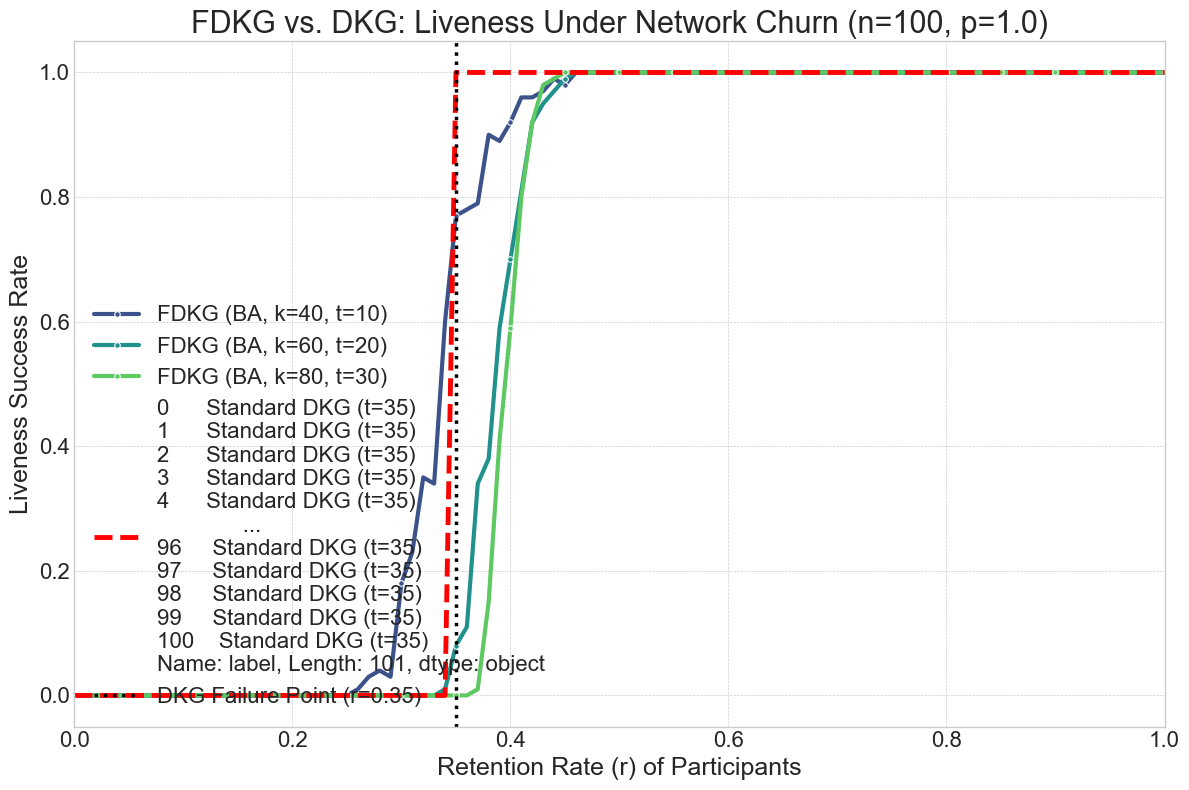

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. Load the NEW high-resolution data ---
try:
    df_showdown = pd.read_csv(f'../liveness_sim/showdown_chart_data.csv')
except FileNotFoundError:
    print("Error: 'showdown_chart_data.csv' not found.")
    print("Please run the modified Rust simulation first to generate this file.")
    exit()

# Use a shorter name for retention rate
df_showdown['r'] = df_showdown['tallierRetPct']
n = 100 # We know n is 100

# --- 2. Define the DKG Scenario ---
# The DKG fails when n * r < t_dkg
t_dkg = 35
r_values = sorted(df_showdown['r'].unique())
dkg_success = [1.0 if (n * r) >= t_dkg else 0.0 for r in r_values]
dkg_scenario = pd.DataFrame({
    'r': r_values,
    'successRate': dkg_success,
    'label': f'Standard DKG (t={t_dkg})'
})

# --- 3. Plot the Showdown Chart ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))
plt.rcParams.update({
    'axes.titlesize': 22, 'axes.labelsize': 18, 'xtick.labelsize': 16,
    'ytick.labelsize': 16, 'legend.fontsize': 16
})

# Plot each FDKG scenario from the new data
configs_to_plot = df_showdown[['guardians', 'threshold']].drop_duplicates().values
colors = sns.color_palette("viridis", n_colors=len(configs_to_plot))

for i, (k, t) in enumerate(configs_to_plot):
    fdkg_scenario_data = df_showdown[(df_showdown['guardians'] == k) & (df_showdown['threshold'] == t)]
    sns.lineplot(
        data=fdkg_scenario_data, x='r', y='successRate',
        label=f'FDKG (BA, k={k}, t={t})', color=colors[i],
        linewidth=3, marker='o', markersize=4, markevery=5 # Mark every 5 points
    )

# Plot the modeled DKG line
sns.lineplot(
    data=dkg_scenario, x='r', y='successRate',
    label=dkg_scenario['label'], color='red',
    linewidth=3.5, linestyle='--'
)

# --- 4. Annotate the Chart ---
dkg_fail_point = t_dkg / n
plt.axvline(x=dkg_fail_point, color='black', linestyle=':', linewidth=2.5, label=f'DKG Failure Point (r={dkg_fail_point:.2f})')

# --- 5. Final Touches ---
plt.title(f'FDKG vs. DKG: Liveness Under Network Churn (n={n}, p=1.0)')
plt.xlabel("Retention Rate (r) of Participants")
plt.ylabel("Liveness Success Rate")
plt.ylim(-0.05, 1.05)
plt.xlim(0.0, 1.0)
plt.legend(loc='lower left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig("fdkg_vs_dkg_showdown_hires.png")
plt.show()

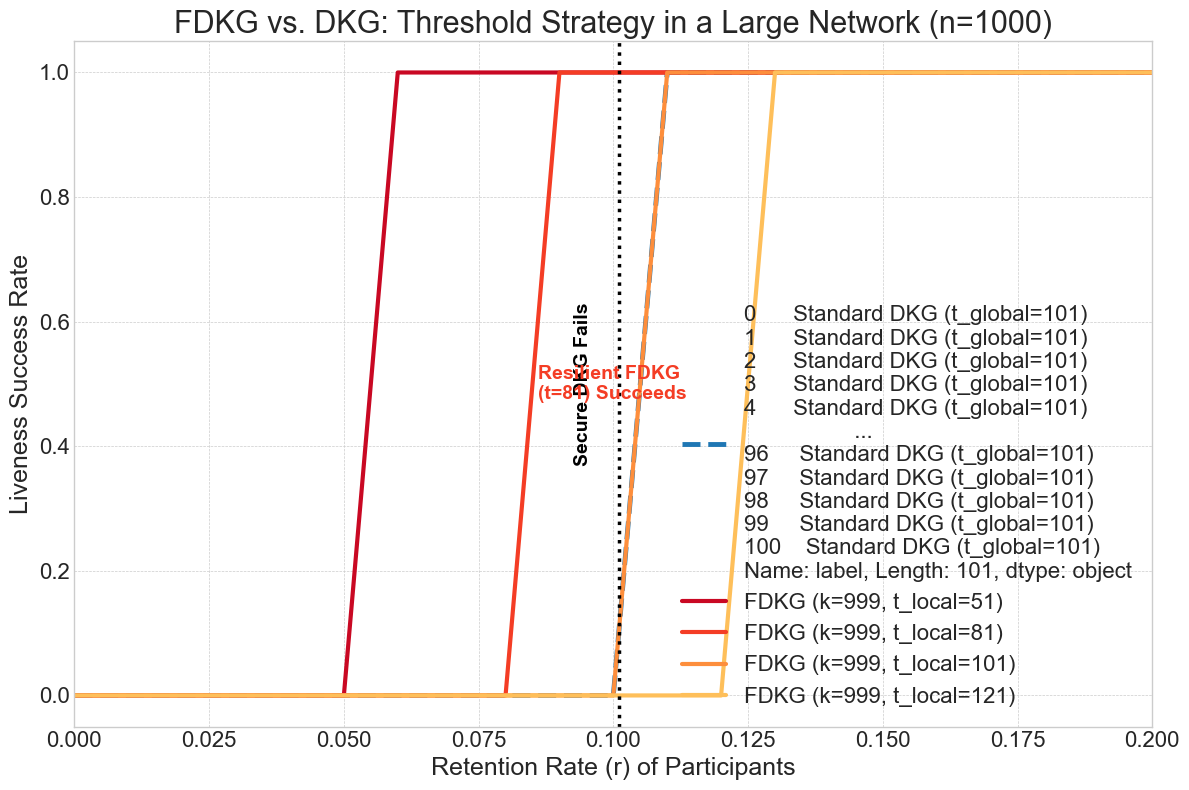

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. Load the new n=1000 'k=n-1' data ---
try:
    df_showdown = pd.read_csv(f'../liveness_sim/n1000_k_is_n_minus_1_showdown_data.csv')
except FileNotFoundError:
    print("Error: 'n1000_k_is_n_minus_1_showdown_data.csv' not found.")
    print("Please run the modified Rust simulation for n=1000 first.")
    exit()

df_showdown['r'] = df_showdown['tallierRetPct']
n = 1000

# --- 2. Define the DKG Scenario for the chart ---
# A secure DKG that tolerates a 10% adversary.
t_dkg_secure = 101
r_values = sorted(df_showdown['r'].unique())
dkg_success = [1.0 if (n * r) >= t_dkg_secure else 0.0 for r in r_values]
dkg_scenario = pd.DataFrame({
    'r': r_values,
    'successRate': dkg_success,
    'label': f'Standard DKG (t_global={t_dkg_secure})'
})

# --- 3. Plot the Showdown Chart ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))
plt.rcParams.update({
    'axes.titlesize': 22, 'axes.labelsize': 18, 'xtick.labelsize': 16,
    'ytick.labelsize': 16, 'legend.fontsize': 16
})

# Plot the secure DKG line
sns.lineplot(
    data=dkg_scenario, x='r', y='successRate',
    label=dkg_scenario['label'], color='#1f77b4', # Blue
    linewidth=3.5, linestyle='--'
)

# Plot the FDKG lines from the simulation data
configs_to_plot = df_showdown[['threshold']].drop_duplicates().sort_values('threshold').values
colors = sns.color_palette("YlOrRd_r", n_colors=len(configs_to_plot) + 1)

for i, (t_local,) in enumerate(configs_to_plot):
    fdkg_data = df_showdown[df_showdown['threshold'] == t_local]
    sns.lineplot(
        data=fdkg_data, x='r', y='successRate',
        label=f'FDKG (k=999, t_local={t_local})', color=colors[i],
        linewidth=3.0, linestyle='-'
    )

# --- 4. Annotate the Chart ---
dkg_fail_point = t_dkg_secure / n
plt.axvline(x=dkg_fail_point, color='black', linestyle=':', linewidth=2.5)

plt.text(dkg_fail_point - 0.005, 0.5, 'Secure DKG Fails', rotation=90,
         verticalalignment='center', horizontalalignment='right',
         fontsize=14, color='black', weight='bold')

# Highlight a resilient FDKG
resilient_fdkg_t = 81
resilient_fail_point = resilient_fdkg_t / n
plt.text(resilient_fail_point + 0.005, 0.5, f'Resilient FDKG\n(t={resilient_fdkg_t}) Succeeds',
         verticalalignment='center', horizontalalignment='left',
         fontsize=14, color=colors[1], weight='bold')


# --- 5. Final Touches ---
plt.title(f'FDKG vs. DKG: Threshold Strategy in a Large Network (n={n})')
plt.xlabel("Retention Rate (r) of Participants")
plt.ylabel("Liveness Success Rate")
plt.ylim(-0.05, 1.05)
plt.xlim(0.0, 0.20) # Zoom in on the critical failure region for large n
plt.legend(loc='lower right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig("n1000_fdkg_vs_dkg_threshold_strategy.png")
plt.show()

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dense_df = pd.read_csv('../liveness_sim/dense_simulation_results_nodes_BarabasiAlbert.csv')
n = 100


# Rename columns to have `k` and `r` in the final plot legend
fdkg_renamed = dense_df.rename(columns={
    'guardians': 'k',
    'tallierRetPct': 'r',
    'fdkgPercentage': 'p'
})

# --- FDKG Scenarios (Imperfect Participation) ---
fdkg_p = 0.7
fdkg_ks = [10, 40, 80]
fdkg_lines = df_renamed[
    (df_renamed['nodes'] == n) &
    (df_renamed['p'] == fdkg_p) &
    (df_renamed['threshold'] == df_renamed['k'] // 4) &
    (df_renamed['k'].isin(fdkg_ks))
].copy()
# Create a clear label for the legend
fdkg_lines['label'] = [f'FDKG (p={fdkg_p}, k={k})' for k in fdkg_lines['k']]


# --- DKG Scenario (Perfect Participation) ---
dkg_k = n - 1
dkg_t = dkg_k // 4
dkg_line = df_renamed[
    (df_renamed['nodes'] == n) &
    (df_renamed['p'] == 1.0) &
    (df_renamed['k'] == dkg_k) &
    (df_renamed['threshold'] == dkg_t)
].copy()
dkg_line['label'] = f'Standard DKG (p=1.0, k=99, t=24)'


# --- Combine dataframes for plotting ---
plot_data = pd.concat([fdkg_lines, dkg_line], ignore_index=True)


# --- 3. Create the Plot ---
plt.figure(figsize=(16, 9))
plt.rcParams.update({
    'axes.titlesize': 26,
    'axes.labelsize': 22,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'legend.fontsize': 18
})
sns.set_style("whitegrid")

# Define custom styles to make DKG stand out
palette = {
    'FDKG (p=0.7, k=10)': '#1f77b4',
    'FDKG (p=0.7, k=40)': '#2ca02c',
    'FDKG (p=0.7, k=80)': '#ff7f0e',
    'Standard DKG (p=1.0, k=99, t=24)': '#d62728' # Red for emphasis
}

dashes = {
    'FDKG (p=0.7, k=10)': (1, 1),
    'FDKG (p=0.7, k=40)': (4, 1),
    'FDKG (p=0.7, k=80)': '', # Solid line
    'Standard DKG (p=1.0, k=99, t=24)': (5, 5) # Dashed line
}

sns.lineplot(
    data=plot_data,
    x='r',
    y='successRate',
    hue='label',
    style='label',
    palette=palette,
    dashes=dashes,
    linewidth=4.5,
    markers=True,
    markersize=9
)

plt.title(f"FDKG (p=0.7) vs. Standard DKG (p=1.0) Resilience\n(n={n}, t≈k/4, Barabási-Albert Model)", pad=20)
plt.xlabel("Retention Rate (r) of Participants", labelpad=15)
plt.ylabel("Liveness Success Rate", labelpad=15)
plt.ylim(-0.05, 1.05)
plt.legend(title="Protocol Configuration")
plt.tight_layout()
plt.savefig("fdkg_vs_dkg_participation_comparison.png")
plt.show()

NameError: name 'df_renamed' is not defined

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. Load the Dense Dataset ---
try:
    df_ba = pd.read_csv('../liveness_sim/dense_resilience_data_BarabasiAlbert.csv')
except FileNotFoundError:
    print("Error: Could not find 'dense_resilience_data_BarabasiAlbert.csv'.")
    print("Please run the modified Rust simulation code first to generate this file.")
    exit()

# --- 2. Create Theoretical DKG Line ---
dkg_data = {
    'r': np.linspace(0, 1, 200),
    'successRate': [1.0 if r >= 0.5 else 0.0 for r in np.linspace(0, 1, 200)],
    'label': 'Standard DKG (t=n/2)'
}
dkg_df = pd.DataFrame(dkg_data)

# --- 3. Setup Plotting Environment ---
sns.set_style("whitegrid")
palette = sns.color_palette("viridis", n_colors=4) # Palette for n=100, 200, 500, 1000
plot_params = {
    'axes.titlesize': 24,
    'axes.labelsize': 20,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'legend.fontsize': 17,
    'lines.linewidth': 4,
    'lines.markersize': 0 # No markers for a smooth line plot
}
plt.rcParams.update(plot_params)

# --- Function to create the plot ---
def create_resilience_plot(data, dkg_line, title, filename, x_lim=None):
    plt.figure(figsize=(15, 9))
    
    # Plot FDKG Data
    network_sizes = sorted(data['nodes'].unique())
    for i, n in enumerate(network_sizes):
        subset = data[data['nodes'] == n]
        sns.lineplot(
            data=subset,
            x='tallierRetPct',
            y='successRate',
            label=f'FDKG (BA) n={n}',
            color=palette[i],
            linestyle='-'
        )

    # Plot the DKG "Cliff"
    sns.lineplot(
        data=dkg_line,
        x='r',
        y='successRate',
        label=dkg_line['label'].iloc[0],
        color='red',
        linestyle='--'
    )
    
    # Add vertical line for DKG failure point
    plt.axvline(x=0.5, color='red', linestyle=':', linewidth=2.5, ymax=0.95)
    plt.text(0.5, 0.5, ' DKG Failure Threshold', color='red', ha='left', va='center', rotation=90, fontsize=16, backgroundcolor=(1,1,1,0.6))


    plt.title(title, pad=20)
    plt.xlabel("Retention Rate (r)", labelpad=15)
    plt.ylabel("Liveness Success Rate", labelpad=15)
    plt.ylim(-0.05, 1.05)
    
    if x_lim:
        plt.xlim(x_lim)
        
    plt.legend(title="Protocol & Network Size")
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

# --- 4. Generate Both Plots ---

# Plot 1: Full View (0.0 to 1.0)
create_resilience_plot(
    df_ba, 
    dkg_df,
    "FDKG (BA) Resilience vs. Standard DKG Brittleness",
    "definitive_resilience_comparison_full.png"
)

# Plot 2: Zoomed-in View (0.4 to 0.6)
create_resilience_plot(
    df_ba,
    dkg_df,
    "Resilience at the Critical Threshold (Zoomed In)",
    "definitive_resilience_comparison_zoom.png",
    x_lim=(0.4, 0.6)
)